# Facial Expression Recognition (Emotion Detection)

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
train_path = '../input/fer2013/train'
val_path = '../input/fer2013/test'

In [3]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

**ANGRY**

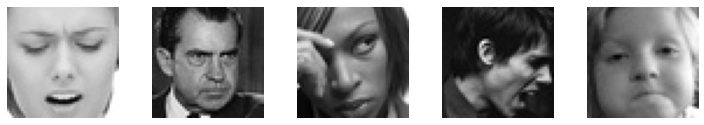

In [4]:
plot_images(train_path+'/angry')

**DISGUSTED**

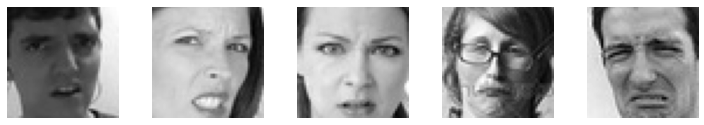

In [5]:
plot_images(train_path+'/disgust')

**FEARFUL**

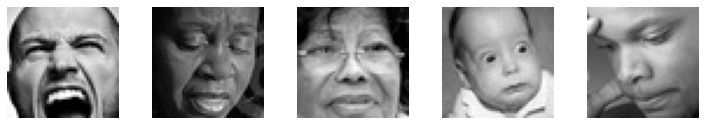

In [6]:
plot_images(train_path+'/fear')

**HAPPY**

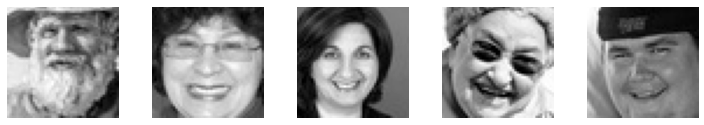

In [7]:
plot_images(train_path+'/happy')

**NEUTRAL**

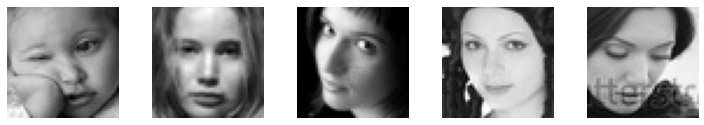

In [8]:
plot_images(train_path+'/neutral')

**SAD**

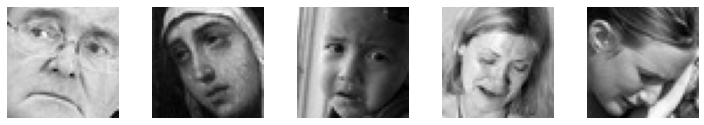

In [9]:
plot_images(train_path+'/sad')

**SURPRISED**

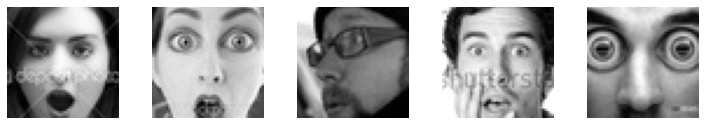

In [10]:
plot_images(train_path+'/surprise')

**PLOT DATA**

In [11]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  barlist[0].set_color('r')
  barlist[1].set_color('black')
  plt.show()

{'surprise': 3171, 'fear': 4097, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'disgust': 436, 'happy': 7215}


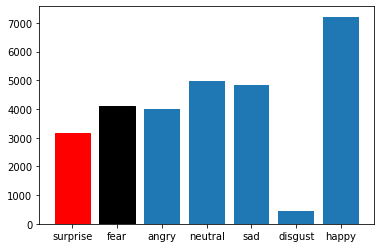

In [12]:
plot_bar_chart_diagram(train_path)

{'surprise': 831, 'fear': 1024, 'angry': 958, 'neutral': 1233, 'sad': 1247, 'disgust': 111, 'happy': 1774}


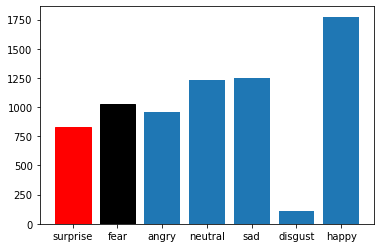

In [13]:
plot_bar_chart_diagram(val_path)   
  

## Data Generator

In [14]:
batch_size = 34
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  shear_range=10,
                                    zoom_range=0.2,
                                  horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Build Model

In [15]:
input_shape = (48,48,3) # img_rows, img_colums, color_channels
num_classes = 7

In [16]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

2021-11-15 06:18:55.541037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 06:18:55.634874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 06:18:55.635636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 06:18:55.637387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       7

In [17]:
# Compile Model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

# **Train Model**

In [18]:

earlystop =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=15, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)
# checkpoint=tf.keras.callbacks.ModelCheckpoint(
#      checkpoint_path, verbose=1, save_weights_only=True,
#     period=5
# )
callback=[earlystop,reduce_lr]
history = model.fit(train_generator, epochs=100 ,verbose=1, validation_data=val_generator,callbacks=callback)

2021-11-15 06:18:59.830216: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-15 06:19:01.847171: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


845/845 [==============================] - 182s 207ms/step - loss: 2.0391 - accuracy: 0.2443 - val_loss: 1.7128 - val_accuracy: 0.3068
Epoch 2/100
845/845 [==============================] - 53s 62ms/step - loss: 1.7124 - accuracy: 0.3102 - val_loss: 1.6665 - val_accuracy: 0.3658
Epoch 3/100
845/845 [==============================] - 54s 64ms/step - loss: 1.6312 - accuracy: 0.3591 - val_loss: 1.4790 - val_accuracy: 0.4140
Epoch 4/100
845/845 [==============================] - 56s 66ms/step - loss: 1.5595 - accuracy: 0.3903 - val_loss: 1.4310 - val_accuracy: 0.4472
Epoch 5/100
845/845 [==============================] - 54s 64ms/step - loss: 1.4745 - accuracy: 0.4304 - val_loss: 1.3374 - val_accuracy: 0.4834
Epoch 6/100
845/845 [==============================] - 56s 67ms/step - loss: 1.4039 - accuracy: 0.4585 - val_loss: 1.2862 - val_accuracy: 0.5010
Epoch 7/100
845/845 [==============================] - 56s 67ms/step - loss: 1.3418 - accuracy: 0.4854 - val_loss: 1.2246 - val_accuracy: 0.

## Save Model

In [19]:
models.save_model(model,'./emotion_Classifi_ver2.h5') 

## Evaluate Model

In [20]:
# Evaluate Model
score = model.evaluate_generator(val_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss:  0.9353823661804199
Test accuracy:  0.6779047250747681


## Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


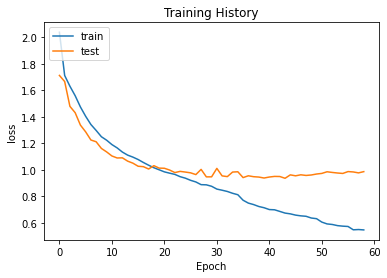

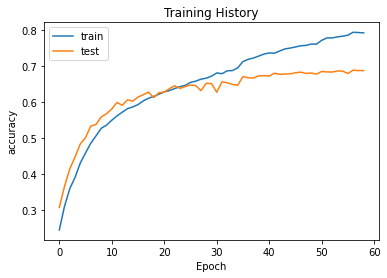

In [21]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [22]:
model = models.load_model('../input/modelfa/emotion_recognization_cnn2.h5')
# for layer in model.layers:
#         layer.trainable = False
# model.layers[-1].trainable=True

In [23]:
def Accuracy_each_class (path):
    Class=sorted(os.listdir(train_path))
    result=[]
    for emotion in os.listdir(path):
        emotion_path=path+'/'+emotion
        Emotion_pre=[]
        Emotion_test=[]
        for i in os.listdir(emotion_path):
            image=cv2.imread(emotion_path+'/'+i)
            image=cv2.resize(image,( 48,48))
            im=image.reshape((1,48,48,3))/255
            emotion_classifi=Class[np.argmax(model.predict(im))]
            Emotion_pre.append(emotion_classifi)
            Emotion_test.append(emotion)
        print(Counter(Emotion_pre))
        accuracy=round(accuracy_score(Emotion_test,Emotion_pre)*100)
        result_emotion={emotion:str(accuracy)+'/%'}
        result.append(result_emotion)
    print(result)
Accuracy_each_class(val_path)
    

Counter({'surprise': 667, 'fear': 51, 'sad': 40, 'happy': 38, 'neutral': 22, 'angry': 12, 'disgust': 1})
Counter({'sad': 323, 'fear': 321, 'neutral': 131, 'surprise': 102, 'angry': 94, 'happy': 48, 'disgust': 5})
Counter({'angry': 454, 'sad': 200, 'neutral': 135, 'fear': 70, 'happy': 61, 'surprise': 21, 'disgust': 17})
Counter({'neutral': 795, 'sad': 258, 'happy': 85, 'angry': 40, 'surprise': 27, 'fear': 26, 'disgust': 2})
Counter({'sad': 800, 'neutral': 213, 'angry': 78, 'happy': 73, 'fear': 61, 'surprise': 16, 'disgust': 6})
Counter({'disgust': 58, 'angry': 27, 'sad': 11, 'neutral': 6, 'happy': 4, 'surprise': 3, 'fear': 2})
Counter({'happy': 1532, 'neutral': 99, 'sad': 71, 'surprise': 37, 'angry': 21, 'fear': 13, 'disgust': 1})
[{'surprise': '80/%'}, {'fear': '31/%'}, {'angry': '47/%'}, {'neutral': '64/%'}, {'sad': '64/%'}, {'disgust': '52/%'}, {'happy': '86/%'}]


In [24]:
Accuracy_each_class(train_path)

Counter({'surprise': 2835, 'fear': 144, 'happy': 98, 'neutral': 49, 'sad': 23, 'angry': 17, 'disgust': 5})
Counter({'fear': 2101, 'sad': 1073, 'neutral': 287, 'surprise': 286, 'angry': 239, 'happy': 90, 'disgust': 21})
Counter({'angry': 2645, 'sad': 587, 'neutral': 448, 'fear': 159, 'happy': 71, 'surprise': 48, 'disgust': 37})
Counter({'neutral': 3955, 'sad': 694, 'happy': 213, 'angry': 58, 'fear': 25, 'surprise': 19, 'disgust': 1})
Counter({'sad': 3986, 'neutral': 497, 'angry': 161, 'fear': 107, 'happy': 50, 'surprise': 21, 'disgust': 8})
Counter({'disgust': 343, 'angry': 57, 'sad': 25, 'fear': 7, 'surprise': 3, 'happy': 1})
Counter({'happy': 6946, 'neutral': 143, 'surprise': 63, 'sad': 36, 'angry': 14, 'fear': 13})
[{'surprise': '89/%'}, {'fear': '51/%'}, {'angry': '66/%'}, {'neutral': '80/%'}, {'sad': '83/%'}, {'disgust': '79/%'}, {'happy': '96/%'}]


# **Pre-Train VGGFace**

In [25]:
# from keras_vggface.vggface import VGGFace

In [26]:
# layer_input=VGG16(weights='imagenet',input_shape=(48,48,3),include_top=False)
# layer_input.trainable = False

In [27]:
# model = models.Sequential()
# model.add( layer_input)
# model.add(layers.Flatten())

# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(7, activation='softmax'))

# model.summary()

In [28]:
# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

In [29]:
# earlystop =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                           min_delta=0, 
#                           patience=7, 
#                           verbose=1, 
#                           restore_best_weights=True)
                        
# # reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
# #                               factor=0.2, 
# #                               patience=6, 
# #                               verbose=1, 
# #                               min_delta=0.0001)
# callback=[earlystop]

In [30]:
# history = model.fit(train_generator, epochs=100,verbose=1, validation_data=val_generator)